In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('no_outlier_df.csv', low_memory=False)
data.head()

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,purpose,city,locality,address,id,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
0,1100.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/80...,3.0,3.0,22000.0,1150 Square Feet Apartment For Rent In Mohamma...,The apartment of 1100 Square Feet is located ...,https://www.bproperty.com/en/property/details-...,Rent,Dhaka,Mohammadpur,"Shyamoli Housing, Shekhertek",bproperty-14087,0,2,2,0,5,0,4,Dhaka,Mohammadpur
1,1300.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/13...,3.0,3.0,40000.0,Grab This Lovely Flat For Rent In Bashundhara ...,This lovely apartment is located in a great lo...,https://www.bproperty.com/en/property/details-...,Rent,Dhaka,Bashundhara R-A,Block D,bproperty-14091,0,2,2,0,4,0,5,Dhaka,Bashundhara R/A
2,1500.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,35000.0,1500 Square Feet Apartment With Necessary Resi...,"Make this beautiful 1,500 Sft apartment in Utt...",https://www.bproperty.com/en/property/details-...,Rent,Dhaka,Uttara,Sector 4,bproperty-14092,0,1,3,2,2,0,4,Dhaka,Uttara
3,1350.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000.0,Wow! This 1350 Sq Ft Apartment For Rent In Bas...,"In a very busy city like Dhaka, everyone tranc...",https://www.bproperty.com/en/property/details-...,Rent,Dhaka,Bashundhara R-A,Block K,bproperty-14093,0,0,0,0,4,0,3,Dhaka,Bashundhara R/A
4,1825.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,60000.0,This 1825 Sq. Ft Apartment Will Ensure Your Go...,"In a very busy city like Dhaka, everyone tranc...",https://www.bproperty.com/en/property/details-...,Rent,Dhaka,Uttara,Sector 9,bproperty-14094,0,2,1,0,3,0,4,Dhaka,Uttara


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29813 entries, 0 to 29812
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   29813 non-null  float64
 1   building_type                          29813 non-null  object 
 2   building_nature                        29813 non-null  object 
 3   image_url                              16299 non-null  object 
 4   num_bath_rooms                         29813 non-null  float64
 5   num_bed_rooms                          29813 non-null  float64
 6   price                                  29813 non-null  float64
 7   property_description                   16557 non-null  object 
 8   property_overview                      16321 non-null  object 
 9   property_url                           29794 non-null  object 
 10  purpose                                29813 non-null  object 
 11  ci

In [7]:
data.columns

Index(['area', 'building_type', 'building_nature', 'image_url',
       'num_bath_rooms', 'num_bed_rooms', 'price', 'property_description',
       'property_overview', 'property_url', 'purpose', 'city', 'locality',
       'address', 'id', 'relaxation_amenity_count', 'security_amenity_count',
       'maintenance_or_cleaning_amenity_count', 'social_amenity_count',
       'expendable_amenity_count', 'service_staff_amenity_count',
       'unclassify_amenity_count', 'division', 'zone'],
      dtype='object')

In [8]:
#Selecting the columns which are required for price prediction
cols=['area', 'building_type', 'building_nature',
       'num_bath_rooms', 'num_bed_rooms', 'price',
       'purpose', 'city', 'locality',
       'relaxation_amenity_count', 'security_amenity_count',
       'maintenance_or_cleaning_amenity_count', 'social_amenity_count',
       'expendable_amenity_count', 'service_staff_amenity_count',
       'unclassify_amenity_count','division', 'zone']
housing_df=data[cols]
housing_df.head()

,area,building_type,building_nature,num_bath_rooms,num_bed_rooms,price,purpose,city,locality,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
0,1100.0,Apartment,Residential,3.0,3.0,22000.0,Rent,Dhaka,Mohammadpur,0,2,2,0,5,0,4,Dhaka,Mohammadpur
1,1300.0,Apartment,Residential,3.0,3.0,40000.0,Rent,Dhaka,Bashundhara R-A,0,2,2,0,4,0,5,Dhaka,Bashundhara R/A
2,1500.0,Apartment,Residential,3.0,3.0,35000.0,Rent,Dhaka,Uttara,0,1,3,2,2,0,4,Dhaka,Uttara
3,1350.0,Apartment,Residential,3.0,3.0,20000.0,Rent,Dhaka,Bashundhara R-A,0,0,0,0,4,0,3,Dhaka,Bashundhara R/A
4,1825.0,Apartment,Residential,4.0,3.0,60000.0,Rent,Dhaka,Uttara,0,2,1,0,3,0,4,Dhaka,Uttara


In [9]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29813 entries, 0 to 29812
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   29813 non-null  float64
 1   building_type                          29813 non-null  object 
 2   building_nature                        29813 non-null  object 
 3   num_bath_rooms                         29813 non-null  float64
 4   num_bed_rooms                          29813 non-null  float64
 5   price                                  29813 non-null  float64
 6   purpose                                29813 non-null  object 
 7   city                                   29813 non-null  object 
 8   locality                               29813 non-null  object 
 9   relaxation_amenity_count               29813 non-null  int64  
 10  security_amenity_count                 29813 non-null  int64  
 11  ma

In [10]:
housing_df.isnull().sum()

area                                      0
building_type                             0
building_nature                           0
num_bath_rooms                            0
num_bed_rooms                             0
price                                     0
purpose                                   0
city                                      0
locality                                  0
relaxation_amenity_count                  0
security_amenity_count                    0
maintenance_or_cleaning_amenity_count     0
social_amenity_count                      0
expendable_amenity_count                  0
service_staff_amenity_count               0
unclassify_amenity_count                  0
division                                  1
zone                                     80
dtype: int64

In [11]:
#Imputing the missing zone values with locality values
for index,row in housing_df.iterrows():
    if row['zone'] is np.nan:  
        housing_df.at[index,'zone'] = row['locality']

In [12]:
housing_df=housing_df.dropna().reset_index(drop=True)

In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29812 entries, 0 to 29811
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   29812 non-null  float64
 1   building_type                          29812 non-null  object 
 2   building_nature                        29812 non-null  object 
 3   num_bath_rooms                         29812 non-null  float64
 4   num_bed_rooms                          29812 non-null  float64
 5   price                                  29812 non-null  float64
 6   purpose                                29812 non-null  object 
 7   city                                   29812 non-null  object 
 8   locality                               29812 non-null  object 
 9   relaxation_amenity_count               29812 non-null  int64  
 10  security_amenity_count                 29812 non-null  int64  
 11  ma

In [14]:
#getting metrics for numerical data
housing_df.describe()

,area,num_bath_rooms,num_bed_rooms,price,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
count,29812.000000,29812.000000,29812.000000,2.981200e+04,29812.000000,29812.000000,29812.000000,29812.000000,29812.000000,29812.000000,29812.000000
mean,1657.588709,1.658359,2.312861,3.617356e+06,0.012512,0.515598,0.838823,0.082517,1.267644,0.014524,1.880484
std,1215.095122,1.552902,1.274519,6.566238e+06,0.179483,0.742924,1.022713,0.402143,1.566538,0.191279,2.012950
min,93.000000,0.000000,0.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1050.000000,0.000000,2.000000,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1350.000000,2.000000,3.000000,1.300000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2000.000000,3.000000,3.000000,6.000000e+06,0.000000,1.000000,2.000000,0.000000,3.000000,0.000000,3.000000
max,17000.000000,10.000000,10.000000,2.600000e+08,5.000000,4.000000,3.000000,5.000000,6.000000,4.000000,17.000000


In [15]:
#Get list of categorical columns
cat_cols=housing_df.select_dtypes(include='object').columns.tolist()
cat_cols

['building_type',
 'building_nature',
 'purpose',
 'city',
 'locality',
 'division',
 'zone']

In [16]:
#get the unique values corresponding to each categorical column
for col in cat_cols:
  print(col+' : ',housing_df[col].unique())
  print('\n')

building_type :  ['Apartment' 'Duplex' 'House' 'Residential Plot' 'Building' 'Others'
 'Commercial Plot' 'Shop' 'Office' 'Floor' 'Warehouse' 'Factory']


building_nature :  ['Residential' 'Commercial']


purpose :  ['Rent' 'Sale']


city :  ['Dhaka' 'Chattogram' 'Sylhet' 'Rangpur' 'Khulna' 'Rajshahi' 'Dinajpur'
 'Gazipur' 'Cumilla' 'Mymensingh' 'Jashore' 'Naogaon' 'Narayanganj'
 'Barishal' 'Bogura' 'Madaripur' 'Brahmanbaria' 'Narsingdi' 'Thakurgaon'
 'Magura' 'Barguna' 'Gaibandha' 'Sirajganj' 'Shariatpur'
 'Narayanganj City' 'Chittagong' 'Manikganj' 'Kishoreganj' 'Chandpur'
 'Habiganj' 'Bandarban' 'Sherpur' 'Faridpur' 'Jamalpur' 'Feni' 'Noakhali'
 'Kushtia']


locality :  ['Mohammadpur' 'Bashundhara R-A' 'Uttara' 'Mirpur' 'Baridhara' 'Lalmatia'
 'Muradpur' 'Hazaribag' 'Gulshan' 'Panchlaish' 'Khulshi' 'Dhanmondi'
 'Hatirpool' '9 No. North Pahartali Ward' 'Cantonment' 'Banasree'
 'Khilkhet' 'Double Mooring' 'Malibagh' '4 No Chandgaon Ward' 'Maghbazar'
 'Eskaton' 'Ibrahimpur' 'Rampura' 'B

### Univariate analysis for the categorical columns

In [17]:
housing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,29812.0,1.657589e+03,1.215095e+03,93.0,1050.0,1350.0,2000.0,17000.0
num_bath_rooms,29812.0,1.658359e+00,1.552902e+00,0.0,0.0,2.0,3.0,10.0
num_bed_rooms,29812.0,2.312861e+00,1.274519e+00,0.0,2.0,3.0,3.0,10.0
price,29812.0,3.617356e+06,6.566238e+06,4200.0,25000.0,130000.0,6000000.0,260000000.0
relaxation_amenity_count,29812.0,1.251174e-02,1.794827e-01,0.0,0.0,0.0,0.0,5.0
security_amenity_count,29812.0,5.155977e-01,7.429236e-01,0.0,0.0,0.0,1.0,4.0
maintenance_or_cleaning_amenity_count,29812.0,8.388233e-01,1.022713e+00,0.0,0.0,0.0,2.0,3.0
social_amenity_count,29812.0,8.251711e-02,4.021431e-01,0.0,0.0,0.0,0.0,5.0
expendable_amenity_count,29812.0,1.267644e+00,1.566538e+00,0.0,0.0,0.0,3.0,6.0
service_staff_amenity_count,29812.0,1.452435e-02,1.912787e-01,0.0,0.0,0.0,0.0,4.0


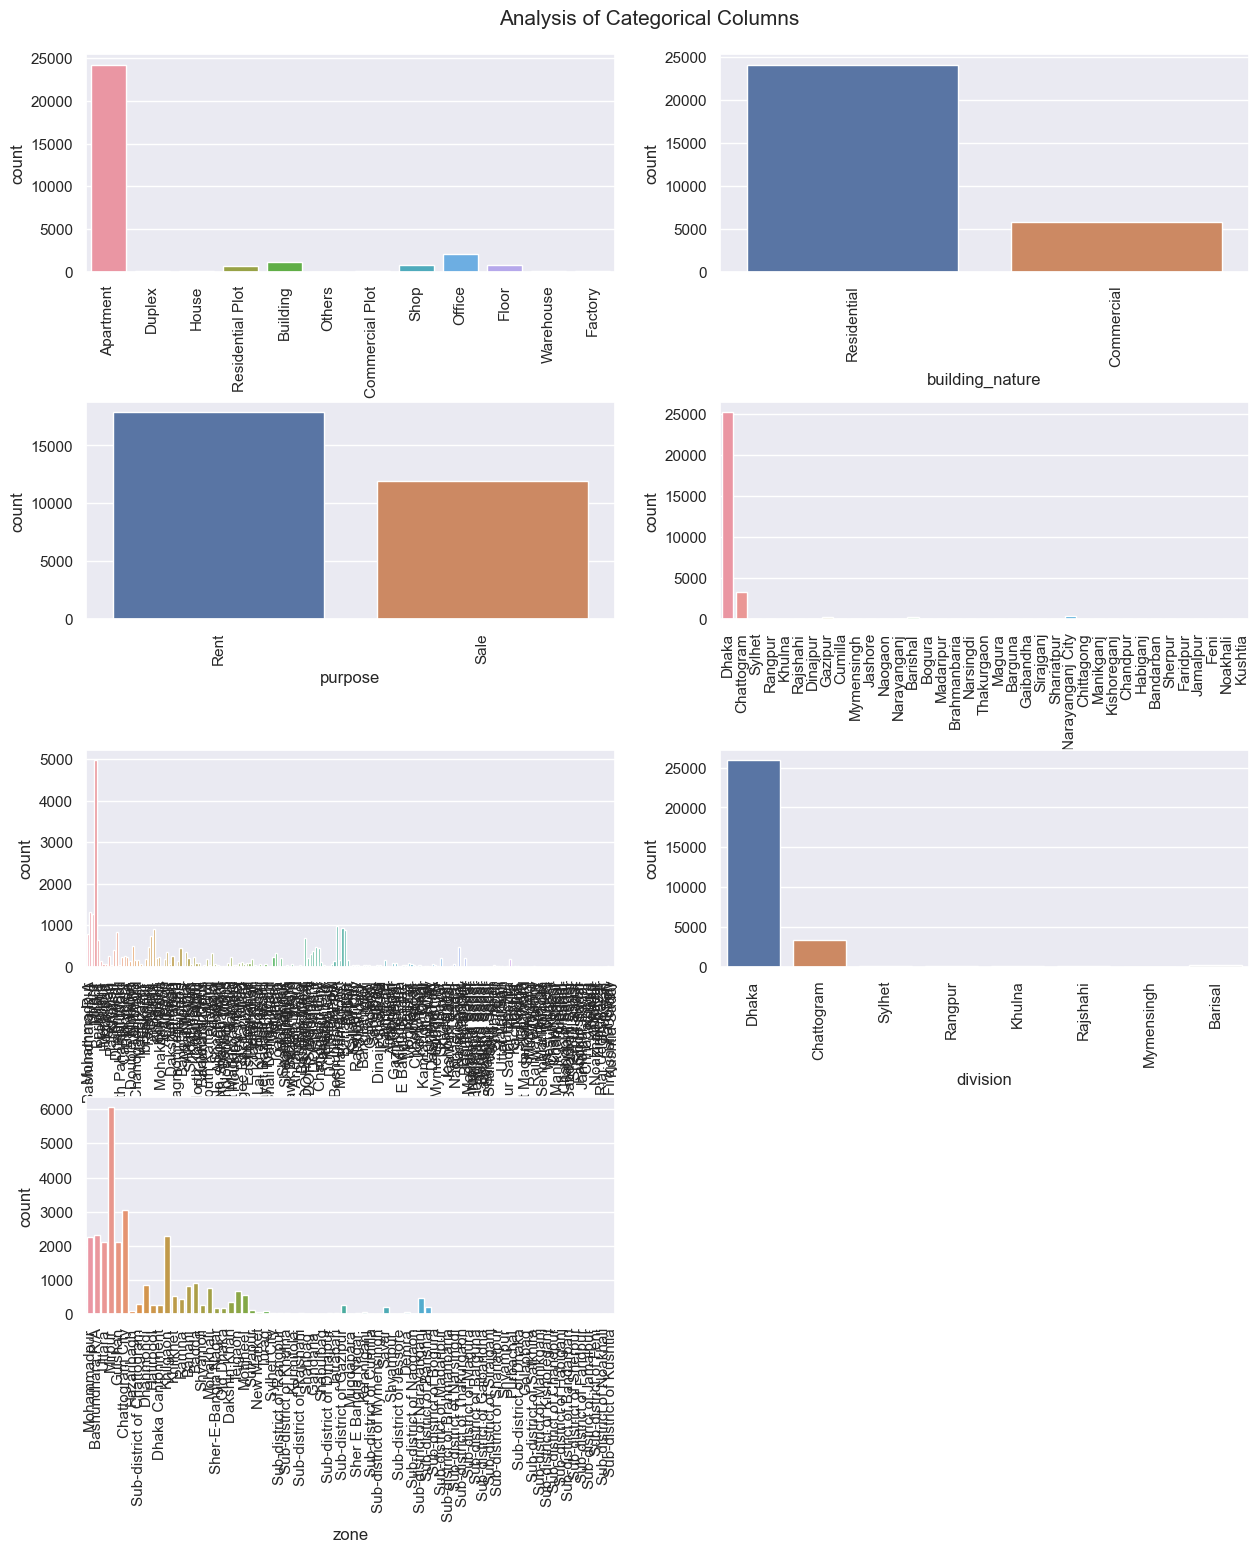

In [18]:
#Count plots for categorical columns
fig=plt.figure(figsize=(15, 15))
fig.suptitle("Analysis of Categorical Columns", fontsize=15)
for i,column in enumerate(cat_cols,1):   
    fig.subplots_adjust(hspace=0.6, top=0.95)    
    plt.subplot(4, 2, i)
    ax=sns.countplot(data=housing_df,x=column)  
    plt.xticks(rotation=90)
    t=plt.xlabel(column)

### Plotting the price wrt categorical column

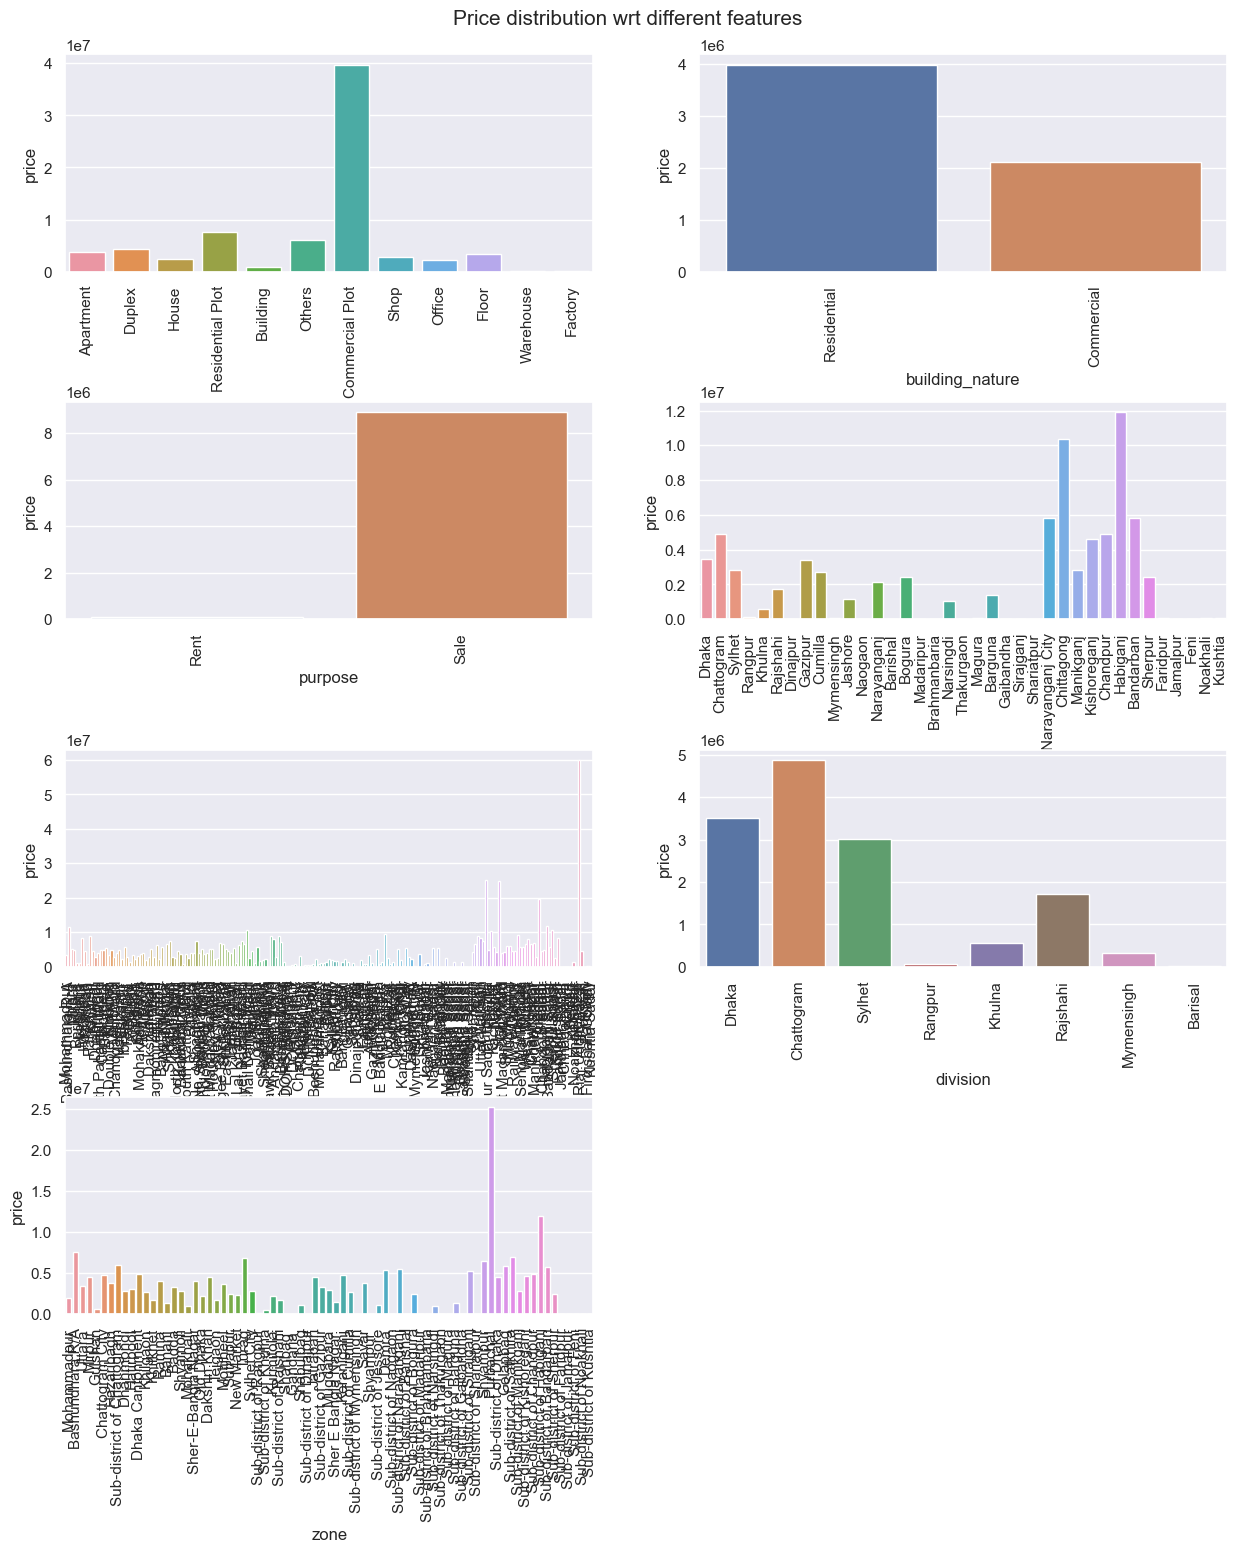

In [19]:
fig=plt.figure(figsize=(15, 15))
fig.suptitle("Price distribution wrt different features", fontsize=15)
for i,col in enumerate(cat_cols,1):   
    fig.subplots_adjust(hspace=0.6, top=0.95)      
    plt.subplot(4, 2, i)
    ax=sns.barplot(x = col,
            y = 'price',
            data = housing_df,
            ci = 0)
    plt.xlabel(col)
    plt.ylabel( 'price')
    plt.xticks(rotation=90)

### Plot for price distribution

Text(0, 0.5, 'Price distribution')

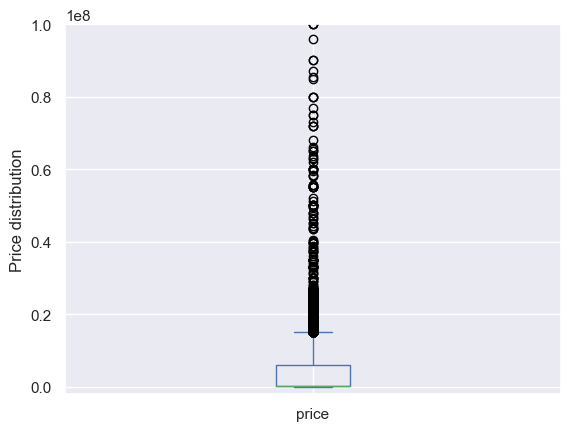

In [20]:
housing_prices = housing_df["price"]
# Price distribution
housing_prices.plot(kind="box")

plt.ylim(-2*1e6, 1.0 * 1e8)
plt.ylabel("Price distribution")

Text(0, 0.5, 'Price distribution')

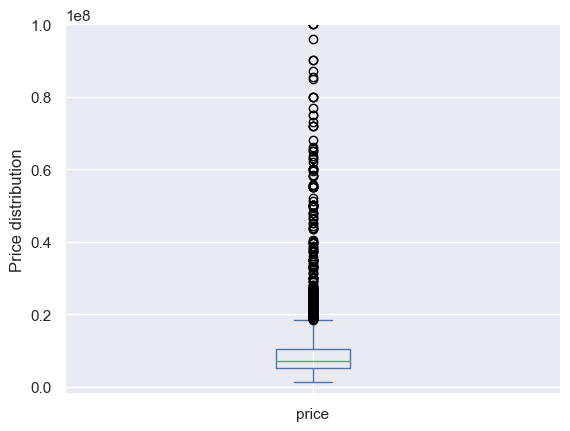

In [21]:
#Price distribution for properties for sale
sale_df=housing_df.query('purpose =="Sale"')
# Price distribution
plt.ylim(-2*1e6, 1.0 * 1e8)
sale_df['price'].plot(kind="box")
plt.ylabel("Price distribution")

Text(0, 0.5, 'Price distribution')

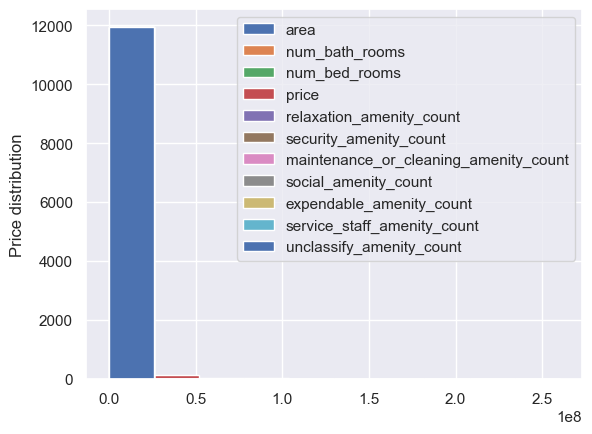

In [22]:
# Price distribution for sale properties
sale_df.plot(kind="hist")

#plt.ylim(-2*1e6, 1.0 * 1e8)
plt.ylabel("Price distribution")

Text(0, 0.5, 'Price distribution')

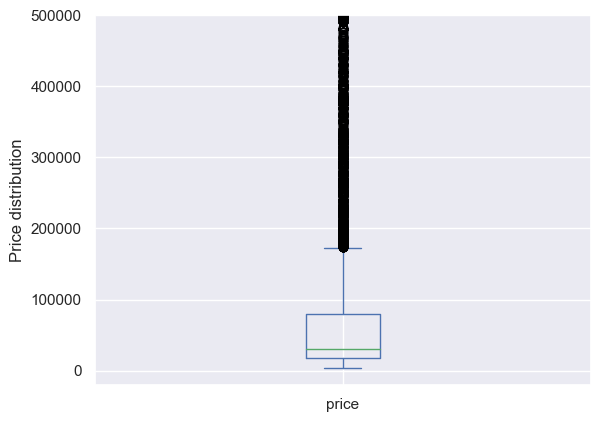

In [23]:
#Price distribution for properties for rent
rent_df=housing_df.query('purpose =="Rent"')
# Price distribution
plt.ylim(-2*1e4, 0.5 * 1e6)
rent_df['price'].plot(kind="box")
plt.ylabel("Price distribution")

Text(0, 0.5, 'Price distribution')

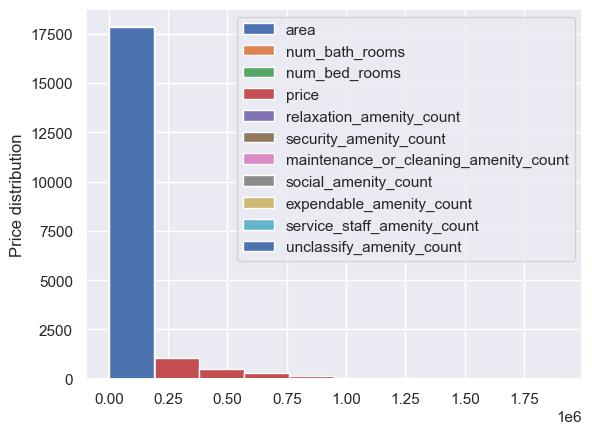

In [24]:
# Price distribution for rent properties
rent_df.plot(kind="hist")

#plt.ylim(-2*1e6, 1.0 * 1e8)
plt.ylabel("Price distribution")

In [25]:
#Get list of numerical columns
num_cols=housing_df.select_dtypes(include=np.number).columns.tolist()
num_cols

['area',
 'num_bath_rooms',
 'num_bed_rooms',
 'price',
 'relaxation_amenity_count',
 'security_amenity_count',
 'maintenance_or_cleaning_amenity_count',
 'social_amenity_count',
 'expendable_amenity_count',
 'service_staff_amenity_count',
 'unclassify_amenity_count']

In [26]:
#Checking skewness of the features
housing_df[num_cols].skew()

area                                      4.264863
num_bath_rooms                            0.227617
num_bed_rooms                            -0.758020
price                                     8.462390
relaxation_amenity_count                 20.231284
security_amenity_count                    1.184009
maintenance_or_cleaning_amenity_count     0.725338
social_amenity_count                      6.172378
expendable_amenity_count                  0.883929
service_staff_amenity_count              14.128286
unclassify_amenity_count                  1.321319
dtype: float64

Text(0, 0.5, 'Price distribution')

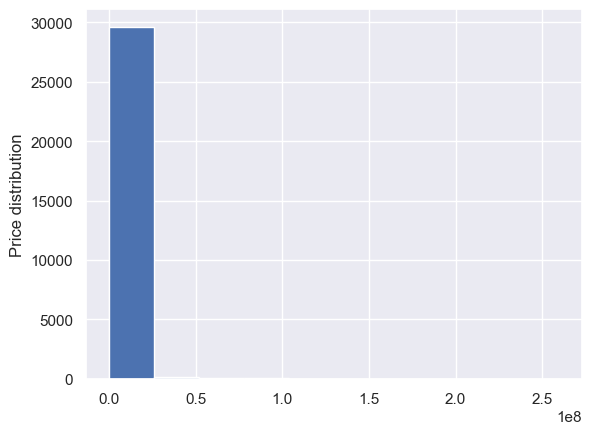

In [27]:
# Price distribution
housing_df.price.plot(kind="hist")

#plt.ylim(-2*1e6, 1.0 * 1e8)
plt.ylabel("Price distribution")

((array([-4.07255268, -3.86111095, -3.74560594, ...,  3.74560594,
          3.86111095,  4.07255268]),
  array([4.200e+03, 4.200e+03, 4.444e+03, ..., 2.000e+08, 2.500e+08,
         2.600e+08])),
 (4861723.665739697, 3617355.56244801, 0.740326414393829))

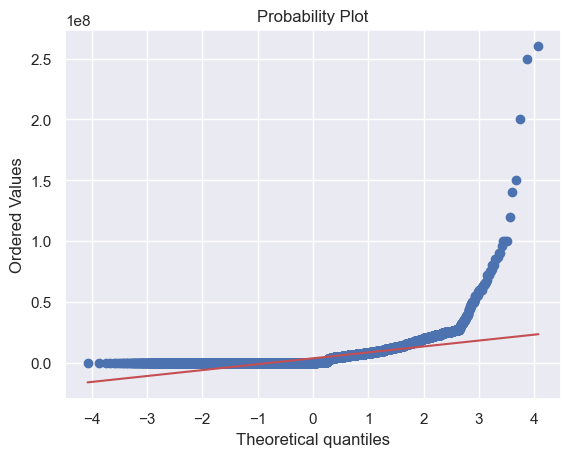

In [28]:
#Plot the QQ plot for price
#importing necessary libraries
import scipy.stats as stats
import pylab
stats.probplot(housing_df.price,plot=pylab)

### Correlation check

In [29]:
corrmat=housing_df[num_cols].corr()
corrmat

,area,num_bath_rooms,num_bed_rooms,price,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
area,1.000000,-0.064758,-0.224360,0.044334,0.001038,0.075266,-0.006023,0.003281,0.024500,0.039163,0.005516
num_bath_rooms,-0.064758,1.000000,0.559192,-0.069188,-0.016316,-0.220299,-0.325622,-0.106548,-0.289242,0.095983,-0.320500
num_bed_rooms,-0.224360,0.559192,1.000000,0.117187,0.016322,-0.003259,-0.011933,-0.088200,0.005337,0.040114,-0.027435
price,0.044334,-0.069188,0.117187,1.000000,0.076367,0.233672,0.281708,0.084082,0.296322,-0.040285,0.244375
relaxation_amenity_count,0.001038,-0.016316,0.016322,0.076367,1.000000,0.097277,0.066176,0.391888,0.123740,-0.002362,0.161608
security_amenity_count,0.075266,-0.220299,-0.003259,0.233672,0.097277,1.000000,0.611667,0.237765,0.613411,0.235287,0.700294
maintenance_or_cleaning_amenity_count,-0.006023,-0.325622,-0.011933,0.281708,0.066176,0.611667,1.000000,0.226131,0.726350,-0.062282,0.659330
social_amenity_count,0.003281,-0.106548,-0.088200,0.084082,0.391888,0.237765,0.226131,1.000000,0.256793,-0.013401,0.262144
expendable_amenity_count,0.024500,-0.289242,0.005337,0.296322,0.123740,0.613411,0.726350,0.256793,1.000000,-0.012302,0.678631
service_staff_amenity_count,0.039163,0.095983,0.040114,-0.040285,-0.002362,0.235287,-0.062282,-0.013401,-0.012302,1.000000,0.414501


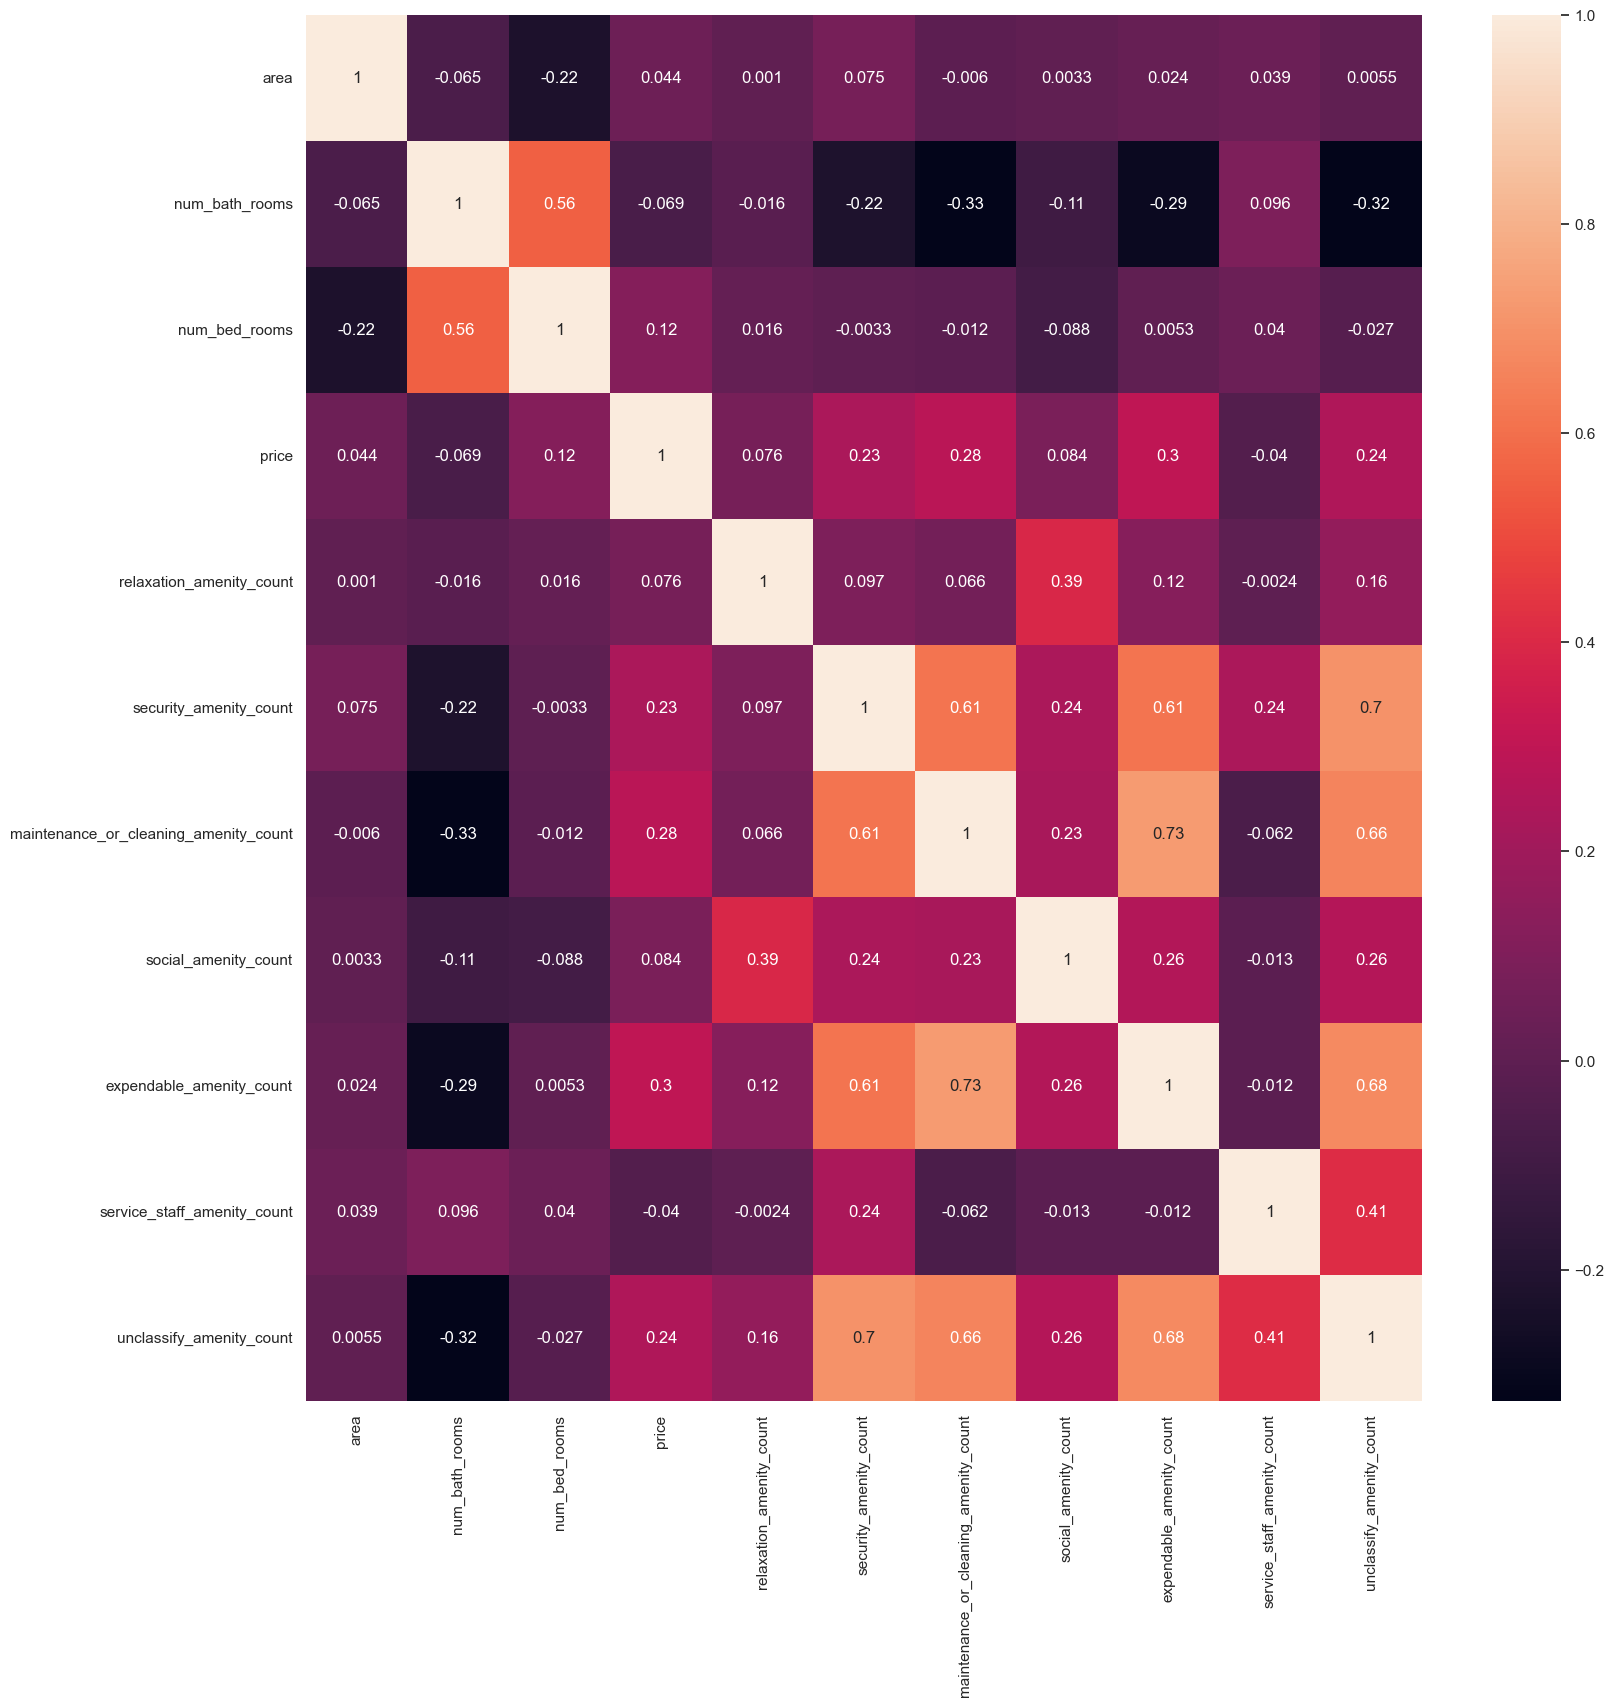

In [30]:
plt.figure(figsize = (18,18))
sns.heatmap(corrmat,annot=True)
plt.show()

1. area and num_bed_rooms are positively correlated
2. area and price is positively correlated
3. maintanence_or_cleaning_amenity_ count and security_amenity count are positively correlated
4. expendable_amenity_ count and security_amenity count are positively correlated
5. unclassify_amenity_ count and security_amenity count are positively correlated
6. maintanence_or_cleaning_amenity_ count and unclassify_amenity_ count are positively correlated
7. maintanence_or_cleaning_amenity_ count and expendable_amenity count are positively correlated
8. expendable_amenity_ count and unclassify_amenity_ count are positively correlated

### Encoding the data

In [31]:
cat_cols

['building_type',
 'building_nature',
 'purpose',
 'city',
 'locality',
 'division',
 'zone']

In [32]:
def encodeCatCols(df):
    from sklearn.preprocessing import OneHotEncoder,LabelEncoder
    #Get the data by One hot encoding
    building_type_enc=OneHotEncoder(drop='first',handle_unknown='ignore')
    building_type = building_type_enc.fit_transform(df.building_type.values.reshape(-1,1)).toarray()
    building_type = pd.DataFrame(building_type,columns = ["building_type_"+str(int(i)) for i in range(building_type.shape[1])]) 
    
    building_nature_enc=OneHotEncoder(drop='first',handle_unknown='ignore')
    building_nature = building_nature_enc.fit_transform(df.building_nature.values.reshape(-1,1)).toarray()
    building_nature = pd.DataFrame(building_nature,columns = ["building_nature_"+str(int(i)) for i in range(building_nature.shape[1])]) 
    
    purpose_enc=OneHotEncoder(drop='first',handle_unknown='ignore')
    purpose = purpose_enc.fit_transform(df.purpose.values.reshape(-1,1)).toarray()
    purpose = pd.DataFrame(purpose,columns = ["purpose_"+str(int(i)) for i in range(purpose.shape[1])]) 

    #division=pd.get_dummies(df.division, drop_first= True)
    #Get the list of cities with count >10
    cities=[]
    city_counts=df.city.value_counts()
    for city,count in city_counts.items():
        if count>10:
            cities.append(city)
    #Setting the cities for counts<10 as Remaining
    for index,row in df.iterrows():
        if row['city'] not in cities:
            df.at[index,'city'] = 'Remaining'
    #Get the data by One hot encoding
    city_enc=OneHotEncoder(drop='first',handle_unknown='ignore')
    city = city_enc.fit_transform(df.city.values.reshape(-1,1)).toarray()
    city = pd.DataFrame(city,columns = ["city_"+str(int(i)) for i in range(city.shape[1])])
    
    le_div=LabelEncoder()
    df['division']=le_div.fit_transform(df['division'])
    le_loc=LabelEncoder()
    df['locality']=le_loc.fit_transform(df['locality'])
    le_zone=LabelEncoder()
    df['zone']=le_zone.fit_transform(df['zone'])
    ## Concatenate the Data Frames
    df=pd.concat([df,building_type,building_nature,purpose,city],axis=1)
    ## Drop Unnecessary columns
    df=df.drop(['building_type','building_nature','purpose','city'],axis=1)
    
    #Pickle the encoders for use in streamlit app
    import pickle
    with open('Building_Type.pkl', 'wb') as output_file:
        pickle.dump(building_type_enc, output_file)
    with open('Building_Nature.pkl', 'wb') as output_file:
        pickle.dump(building_nature_enc, output_file)
    with open('Purpose.pkl', 'wb') as output_file:
        pickle.dump(purpose_enc, output_file)
    with open('City.pkl', 'wb') as output_file:
        pickle.dump(city_enc, output_file)
    with open('Division.pkl', 'wb') as output_file:
        pickle.dump(le_div, output_file)
    with open('Locality.pkl', 'wb') as output_file:
        pickle.dump(le_loc, output_file)
    with open('Zone.pkl', 'wb') as output_file:
        pickle.dump(le_zone, output_file)
    return df

### Versions Used

In [33]:
#!pip install scikit-learn

In [34]:
import sklearn
sklearn.__version__

'1.0.2'

In [35]:
!python -V


Python 3.9.7


In [36]:
np.version.version

'1.21.5'

In [38]:
housing_df=encodeCatCols(housing_df)

In [39]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29812 entries, 0 to 29811
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   29812 non-null  float64
 1   num_bath_rooms                         29812 non-null  float64
 2   num_bed_rooms                          29812 non-null  float64
 3   price                                  29812 non-null  float64
 4   locality                               29812 non-null  int32  
 5   relaxation_amenity_count               29812 non-null  int64  
 6   security_amenity_count                 29812 non-null  int64  
 7   maintenance_or_cleaning_amenity_count  29812 non-null  int64  
 8   social_amenity_count                   29812 non-null  int64  
 9   expendable_amenity_count               29812 non-null  int64  
 10  service_staff_amenity_count            29812 non-null  int64  
 11  un

In [40]:
housing_df.head()

,area,num_bath_rooms,num_bed_rooms,price,locality,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,building_type_6,building_type_7,building_type_8,building_type_9,building_type_10,building_nature_0,purpose_0,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10
0,1100.0,3.0,3.0,22000.0,128,0,2,2,0,5,0,4,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1300.0,3.0,3.0,40000.0,37,0,2,2,0,4,0,5,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1500.0,3.0,3.0,35000.0,190,0,1,3,2,2,0,4,2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1350.0,3.0,3.0,20000.0,37,0,0,0,0,4,0,3,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1825.0,4.0,3.0,60000.0,190,0,2,1,0,3,0,4,2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split data into dependent and independent features

In [41]:
#Getting Independent features
X=housing_df.drop(['price'],axis=1)

In [42]:
#Dependent features
y=housing_df['price']

In [43]:
#getting the dependency scores between independent variables and dependent variable and storing in a dataframe
from sklearn.feature_selection import mutual_info_regression
imp_var=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp_var.columns=['Importance']
#imp_var.sort_values(by='Importance',ascending=False,inplace=True)
imp_var.sort_values(by='Importance',inplace=True)

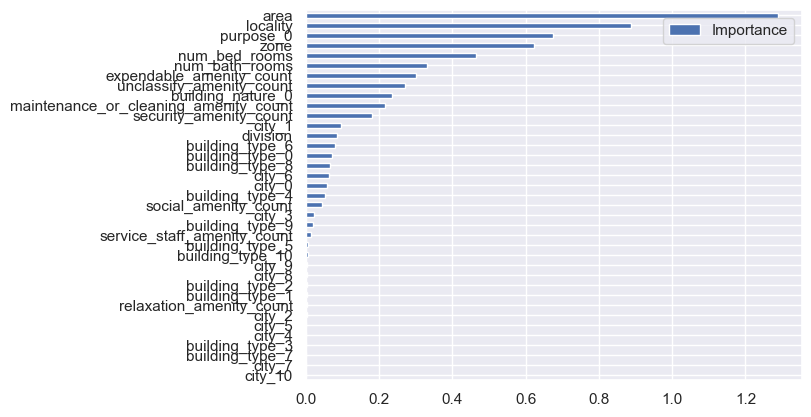

In [44]:
#plot graph of feature importances for top 5 features 
imp_var.plot(kind='barh')
plt.show()

Area influences the price most

### Train test split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [46]:
X_train.head()

,area,num_bath_rooms,num_bed_rooms,locality,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,building_type_6,building_type_7,building_type_8,building_type_9,building_type_10,building_nature_0,purpose_0,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10
12720,1350.0,3.0,3.0,97,0,0,0,0,0,0,0,2,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27792,2400.0,0.0,0.0,190,0,2,1,0,4,0,3,2,74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14407,1465.0,3.0,3.0,124,0,1,1,0,3,0,3,2,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,2850.0,4.0,4.0,31,0,0,0,0,0,0,0,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8136,500.0,1.0,2.0,145,0,0,0,0,0,0,0,2,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols=X.columns
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [48]:
import pickle
with open('StandardScaler.pkl', 'wb') as output_file:
    pickle.dump(sc, output_file)

In [49]:
X_train.head()

,area,num_bath_rooms,num_bed_rooms,locality,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,building_type_6,building_type_7,building_type_8,building_type_9,building_type_10,building_nature_0,purpose_0,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10
12720,-0.252153,0.862573,0.539697,0.073765,-0.070552,-0.691365,-0.820702,-0.203981,-0.808000,-0.074194,-0.933159,0.208293,-0.458700,-0.203012,-0.037224,-0.036655,-0.020481,-0.162015,-0.037224,-0.275284,-0.012952,-0.14812,-0.156479,-0.030386,0.486016,-0.818452,-0.357602,0.429071,-0.038337,-0.096713,-0.033036,-0.038882,-0.123099,-0.036077,-0.041498,-0.0425,-0.037785
27792,0.618422,-1.070960,-1.816377,1.752454,-0.070552,2.011202,0.158336,-0.203981,1.741362,-0.074194,0.559190,0.208293,2.547020,-0.203012,-0.037224,-0.036655,-0.020481,-0.162015,-0.037224,3.632607,-0.012952,-0.14812,-0.156479,-0.030386,-2.057544,-0.818452,-0.357602,0.429071,-0.038337,-0.096713,-0.033036,-0.038882,-0.123099,-0.036077,-0.041498,-0.0425,-0.037785
14407,-0.156804,0.862573,0.539697,0.561127,-0.070552,0.659919,0.158336,-0.203981,1.104022,-0.074194,0.559190,0.208293,-0.124731,-0.203012,-0.037224,-0.036655,-0.020481,-0.162015,-0.037224,-0.275284,-0.012952,-0.14812,-0.156479,-0.030386,0.486016,1.221818,-0.357602,0.429071,-0.038337,-0.096713,-0.033036,-0.038882,-0.123099,-0.036077,-0.041498,-0.0425,-0.037785
5511,0.991526,1.507083,1.325055,-1.117562,-0.070552,-0.691365,-0.820702,-0.203981,-0.808000,-0.074194,-0.933159,0.208293,-0.506410,-0.203012,-0.037224,-0.036655,-0.020481,-0.162015,-0.037224,-0.275284,-0.012952,-0.14812,-0.156479,-0.030386,0.486016,-0.818452,-0.357602,0.429071,-0.038337,-0.096713,-0.033036,-0.038882,-0.123099,-0.036077,-0.041498,-0.0425,-0.037785
8136,-0.956904,-0.426449,-0.245661,0.940186,-0.070552,-0.691365,-0.820702,-0.203981,-0.808000,-0.074194,-0.933159,0.208293,-0.124731,-0.203012,-0.037224,-0.036655,-0.020481,-0.162015,-0.037224,-0.275284,-0.012952,-0.14812,-0.156479,-0.030386,0.486016,-0.818452,-0.357602,0.429071,-0.038337,-0.096713,-0.033036,-0.038882,-0.123099,-0.036077,-0.041498,-0.0425,-0.037785


## Model Building

## Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
print("Coefficient of determination R^2 <-- on train set: {}".format(reg_rf.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(reg_rf.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9641615057363361
Coefficient of determination R^2 <-- on test set: 0.9028288348343587


### Hyper Parameter Tuning

In [138]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 10)]
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4, 5, 10]

In [164]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [165]:
rf_tuned=RandomizedSearchCV(reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=3,verbose=2, n_jobs = -1)

In [166]:
rf_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 8, 10, 11, 13, 15,
                                                      16, 18, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [167]:
rf_tuned.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [52]:
reg_rf_tuned = RandomForestRegressor(n_estimators= 1100,max_depth=20,min_samples_leaf=1,min_samples_split=5)
reg_rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=1100)

In [53]:
y_pred = reg_rf_tuned.predict(X_test)

In [54]:
print("Coefficient of determination R^2 <-- on train set: {}".format(reg_rf_tuned.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(reg_rf_tuned.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9376070632758599
Coefficient of determination R^2 <-- on test set: 0.9033483272411887


In [55]:
tuned_pred=reg_rf_tuned.predict(X_test)

<AxesSubplot: xlabel='price', ylabel='Density'>

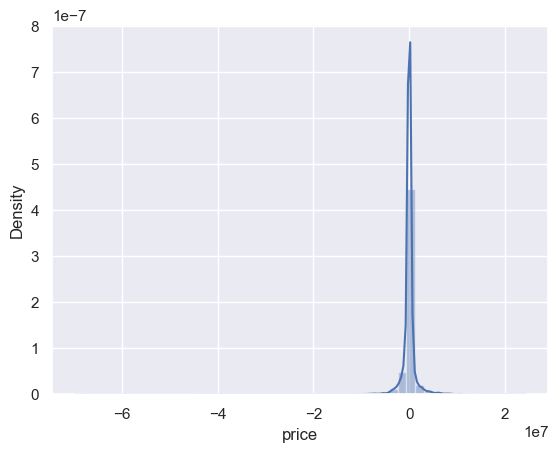

In [56]:
#Plot of the residuals is a normal distribution
sns.distplot(y_test-tuned_pred)

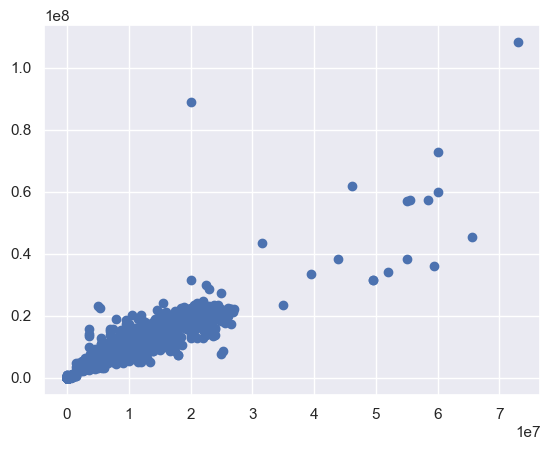

In [57]:
#Scatter plot for actual test data output vs the predicted test values
plt.scatter(y_test,tuned_pred)

In [60]:
# save model to file
pickle.dump(reg_rf_tuned, open("Randomforest.pkl", "wb"))